# ACF & FFT(ACF) of series of OH distances 

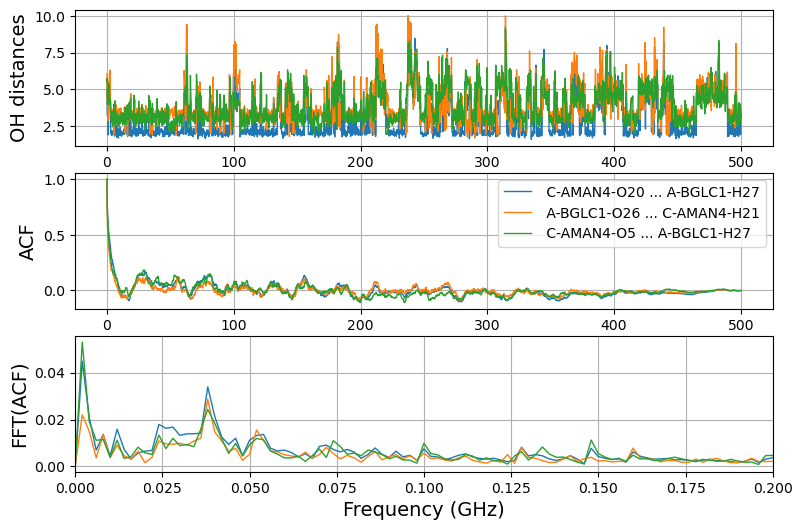

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.fft import fft, fftfreq
from io import StringIO  # Import StringIO from the standard library
#%matplotlib notebook
# Read the entire file into a single string
with open("data/distOH_alain_NEW.csv", "r") as file:
    file_content = file.read()

# Split the content into individual time series using '&'
time_series_list = file_content.split('&')

# Indices of the specific time series you want to analyze

#selected_indices = [0]                  # MM A-BGLC1...C-BGLC1
#selected_indices = [6, 7, 15, 26]       # MM A-BGLC1...C-BGLC2
selected_indices = [1, 3, 14]           # MM A-BGLC1...C-AMAN4 
#selected_indices = [2,8,11,17,18,19,27] # MM A-AMAN6...C-AMAN4
#selected_indices = [4,5,12,16,21,24,25] # MM A-AMAN6...C-BGLC5

# Create a figure for all XY plots
plt.figure(figsize=(9, 6))

#legend_labels = []  # To store legend labels
legend_labels = time_series_list[0].split('\n')
#print(legend_labels)

# Process each time series
for idx, time_series_data in enumerate(time_series_list[1:]):
    # If the time series is not empty (ignoring the last "&")
    if time_series_data.strip():
        # Check if the index is in the list of selected indices
        if idx in selected_indices:
            # Create a DataFrame from the time series data
            df = pd.read_csv(StringIO(time_series_data), delim_whitespace=True)

            # distance.dat obtained by distance_analysis.ipynb
            #fname='data/distance.dat'   
            #dat=np.loadtxt(fname, delimiter=' ', dtype = float)
            #yraw=dat[:]
            #N=len(yraw)
            #print(N)
            #xraw=np.linspace(0,N,N) 
            
            # Extract the "Quakes" column as a pandas Series
            yraw = df["Quakes"]
            np.savetxt('distance_ramon'+str(idx)+'.dat',yraw)
            N=len(yraw)               #Number of frames in the trajectory
            xraw=np.linspace(0,N,N)
            
            dt=0.2                    #time step in ns
    
            # Calculate ACF
            yac = sm.tsa.acf(yraw, nlags=2*N-1)
            xac=xraw
            # Calculate FFT(ACF)
            xacf=fftfreq(N,dt)[:N//2]
            yacf=fft(yac)
            

            # Plot ACF as an XY plot with markers and lines
            #label = f"{legend_labels[-1]} - Time Series {idx + 1}" if legend_labels else f"Time Series {idx + 1}"
            label = f"{legend_labels[idx]}"
            plt.subplot(3,1,1)
            plt.plot(xraw*dt, yraw, marker='', linestyle='-', label=label, linewidth=1)
            plt.subplot(3,1,2)
            plt.plot(xac*dt, yac, marker='', linestyle='-', label=label, linewidth=1)
            plt.subplot(3,1,3)
            plt.plot(xacf,2.0/N * np.abs(yacf[0:N//2]), marker='', linestyle='-', label=label, linewidth=1)
            #save data
            ac = np.column_stack((xac*dt, yac))       #Autocorrelation function
            acf= np.column_stack((xac*dt, yacf))     # FFT(ACF)
            

# Customize the plot
#plt.title("Autocorrelation Function (ACF) - All Time Series")
#%matplotlib notbook
plt.subplot(3,1,1)
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("OH distances", fontsize=14)
plt.grid(True)

plt.subplot(3,1,2)
plt.xlabel("Lag time (ns)", fontsize=14)
plt.ylabel("ACF", fontsize=14)
plt.legend(loc='upper right',fontsize=10)
plt.grid(True)

plt.subplot(3,1,3)
plt.xlabel("Frequency (GHz)", fontsize=14)
plt.ylabel("FFT(ACF)", fontsize=14)
plt.xlim(0,0.2)
plt.grid(True)

plt.show()


# Modelisation with DHOs

Select data Number :1
frequence mode 1 :  0.008695652173913044 Ghz
frequence mode 2 :  0.015384615384615385 Ghz
frequence mode 3 :  0.029411764705882353 Ghz
frequence mode 4 :  0.05128205128205128 Ghz


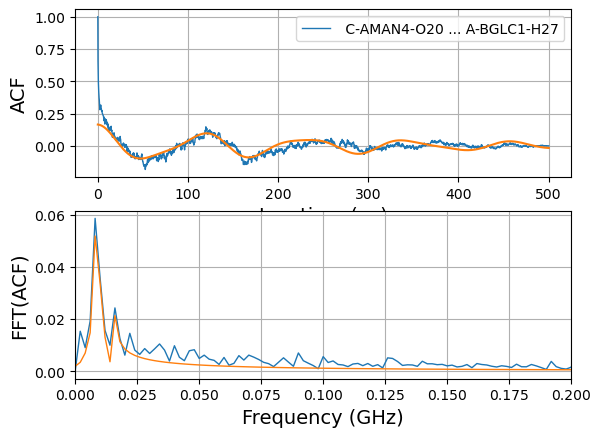

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

sel=int(input('Select data Number :'))
selected=[selected_indices[sel-1]]

ac_range=1              #fraction of the AC function used for calculating the FFT
# DHO model 
#
amp1=0;amp2=0;amp3=0;amp4=0;
# mode 1 : slow motion,  T1~=400 & tau1~=300 for all data !!!  moste visible on series 0, 4, 25  
T1=115       # period
nu1=1/T1     # freq
amp1=0.13  # amplitude
tau1=300     # damping
#mod2
T2=65       # period
nu2=1/T2     # frequency
amp2=0.035  # Amplitude
tau2=300     # damping 
#mode 3
T3=34     # period
nu3=1/T3     # freq
amp3=0.0 # amplitude
tau3=100     # damping
#mode 4
T4=19.5     # period
nu4=1/T4     # freq
amp4=0.0 # amplitude
tau4=200     # damping
#mode 5=relaxation
T5=100    # period
amp5=0.0  # amplitude
tau5=10   # damping


print('frequence mode 1 : ',nu1,'Ghz')
print('frequence mode 2 : ',nu2,'Ghz')
print('frequence mode 3 : ',nu3,'Ghz')
print('frequence mode 4 : ',nu4,'Ghz')
 

for idx, time_series_data in enumerate(time_series_list[1:]):
    # If the time series is not empty (ignoring the last "&")
    if time_series_data.strip():
        # Check if the index is in the list of selected indices
        if idx in selected:
            # Create a DataFrame from the time series data
            df = pd.read_csv(StringIO(time_series_data), delim_whitespace=True)

            # Extract the "Quakes" column as a pandas Series
            
            fname='data/distance.dat'   
            dat=np.loadtxt(fname, delimiter=' ', dtype = float)
            yraw=dat[:]
            Ntot=len(yraw)
            xraw=np.linspace(0,N,N)
            
            
            
            #Ntot = len(df["Quakes"])     #Number of frames in the trajectory
            #yraw = df["Quakes"]
            #yraw=yraw[0:Ntot]
            
            xac=np.linspace(0,Ntot,Ntot)
            
            dt=0.2                    #time step in ns
            N=Ntot
            # Calculate ACF
            yac = sm.tsa.acf(yraw, nlags=Ntot-1)
            # Calculate FFT(ACF) from the AC function in the domain [0:ac_range]
            N=int(Ntot*ac_range)        
            xacf=fftfreq(N,dt)[:N//2]
            yacf=fft(yac[0:N])
            xacs=np.linspace(0,N,N)
            # DHO Model
            ymod1=amp1*np.exp(-xacs*dt/tau1)*np.cos(nu1*2*np.pi*xacs*dt) #ACF
            ymod2=amp2*np.exp(-xacs*dt/tau2)*np.cos(nu2*2*np.pi*xacs*dt)
            ymod3=amp3*np.exp(-xacs*dt/tau3)*np.cos(nu3*2*np.pi*xacs*dt)
            ymod4=amp4*np.exp(-xacs*dt/tau4)*np.cos(nu4*2*np.pi*xacs*dt)
            ymod5=amp5*np.exp(-xacs*dt/tau5)
            ymod=ymod1+ymod2+ymod3+ymod4+ymod5
            ymodf=fft(ymod)     #FFT 
            

            # Plot ACF as an XY plot with markers and lines
            #label = f"{legend_labels[-1]} - Time Series {idx + 1}" if legend_labels else f"Time Series {idx + 1}"
            label = f"{legend_labels[idx]}"
            plt.subplot(2,1,1)
            plt.plot(xac*dt, yac, marker='', linestyle='-', label=label, linewidth=1)
            plt.plot(xacs*dt,ymod)
            plt.subplot(2,1,2)
            plt.plot(xacf,2.0/N * np.abs(yacf[0:N//2]), marker='', linestyle='-', label=label, linewidth=1)
            plt.plot(xacf,2.0/N * np.abs(ymodf[0:N//2]), marker='', linestyle='-', label=label, linewidth=1)

# Customize the plot
#plt.title("Autocorrelation Function (ACF) - All Time Series")
#%matplotlib notbook
plt.subplot(2,1,1)
plt.xlabel("Lag time (ns)", fontsize=14)
plt.ylabel("ACF", fontsize=14)
plt.legend(loc='upper right',fontsize=10)
plt.grid(True)

plt.subplot(2,1,2)
plt.xlabel("Frequency (GHz)", fontsize=14)
plt.ylabel("FFT(ACF)", fontsize=14)
plt.xlim(0,0.2)
plt.grid(True)

plt.show()

# QM DATA -------------------------------------------------------------------

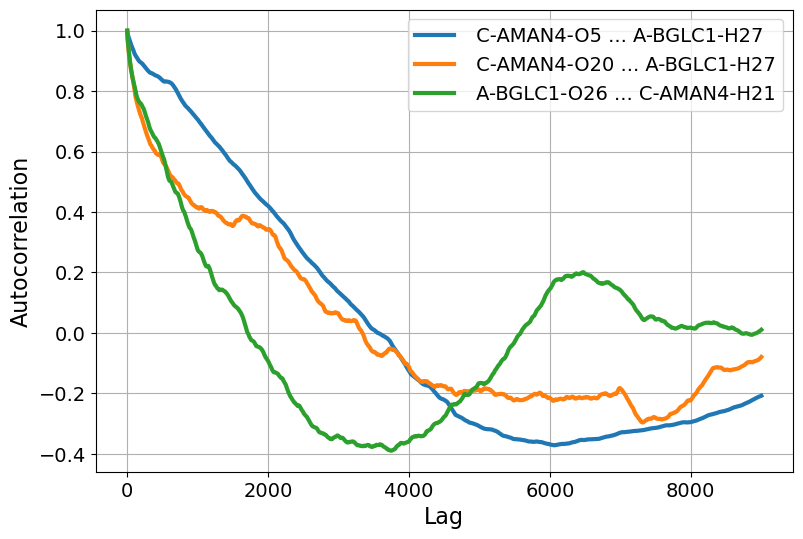

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from io import StringIO  # Import StringIO from the standard library

# Read the entire file into a single string
with open("distOH_dftb_NEW.csv", "r") as file:
    file_content = file.read()

# Split the content into individual time series using '&'
time_series_list = file_content.split('&')

# Indices of the specific time series you want to analyze
#selected_indices = [0, 8, 11] # DFTB A-BGLC1...C-BGLC2
selected_indices = [1, 5, 10] # DFTB A-BGLC1...C-AMAN4
#selected_indices = [2, 3, 6] # DFTB A-AMAN6...C-AMAN4

# Create a figure for all XY plots
plt.figure(figsize=(9, 6))

#legend_labels = []  # To store legend labels
legend_labels = time_series_list[0].split('\n')
#print(legend_labels)

# Process each time series
for idx, time_series_data in enumerate(time_series_list[1:]):
    # If the time series is not empty (ignoring the last "&")
    if time_series_data.strip():
        # Check if the index is in the list of selected indices
        if idx in selected_indices:
            # Create a DataFrame from the time series data
            df = pd.read_csv(StringIO(time_series_data), delim_whitespace=True)

            # Extract the "Quakes" column as a pandas Series
            quake_data = df["Quakes"]

            # Calculate ACF
            acf_result = sm.tsa.acf(quake_data, nlags=9000)

            # Plot ACF as an XY plot with markers and lines
            #label = f"{legend_labels[-1]} - Time Series {idx + 1}" if legend_labels else f"Time Series {idx + 1}"
            label = f"{legend_labels[idx]}"
            plt.plot(range(len(acf_result)), acf_result, marker='', linestyle='-', label=label, linewidth=3)
            #save data
            acf = np.column_stack((range(len(acf_result)), acf_result))
            name='acf_qm'+str(idx)+'.dat'
            np.savetxt(name,acf)
# Customize the plot
#plt.title("Autocorrelation Function (ACF) - All Time Series")
plt.xlabel("Lag", fontsize=16)
plt.ylabel("Autocorrelation", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)

# Change the tick label size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
